In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Flask_Healthcare_Application_Survey.csv")

# Display missing values summary before cleaning
print("Missing values per column (before cleaning):")
print(data.isnull().sum())

Missing values per column (before cleaning):
Age              0
Gender           0
Income           0
Utilities        0
Entertainment    0
School Fees      1
Shopping         0
Healthcare       0
dtype: int64


In [5]:
# Drop rows where 'School Fees' is missing
data = data.dropna(subset=['School Fees'])

# Confirm no missing values remain
print("Missing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
Age              0
Gender           0
Income           0
Utilities        0
Entertainment    0
School Fees      0
Shopping         0
Healthcare       0
dtype: int64


In [7]:
# Save the cleaned dataset
data.to_csv("Cleaned_Flask_Healthcare_Application_Survey.csv", index=False)

print("Rows with missing 'School Fees' have been removed. Cleaned dataset saved as 'Cleaned_Flask_Healthcare_Application_Survey.csv'.")

Rows with missing 'School Fees' have been removed. Cleaned dataset saved as 'Cleaned_Flask_Healthcare_Application_Survey.csv'.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV
data = pd.read_csv("Cleaned_Flask_Healthcare_Application_Survey.csv")

# Group by age and calculate total income
income_by_age = data.groupby('Age')['Income'].sum().reset_index().sort_values(by='Income', ascending=False)

# Define color mapping based on age brackets
def assign_color(age):
    if 0 <= age <= 10:
        return 'blue'
    elif 20 <= age <= 30:
        return 'yellow'
    elif 30 <= age <= 40:
        return 'green'
    elif 40 <= age <= 50:
        return 'red'
    elif 50 <= age <= 60:
        return 'orange'
    else:
        return 'gray'

# Apply color assignment
income_by_age['Color'] = income_by_age['Age'].apply(assign_color)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(income_by_age['Age'], income_by_age['Income'], color=income_by_age['Color'])
plt.title("Ages with the Highest Income", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Total Income", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Ages_highest_income.png")  # Save the chart as an image
plt.show()

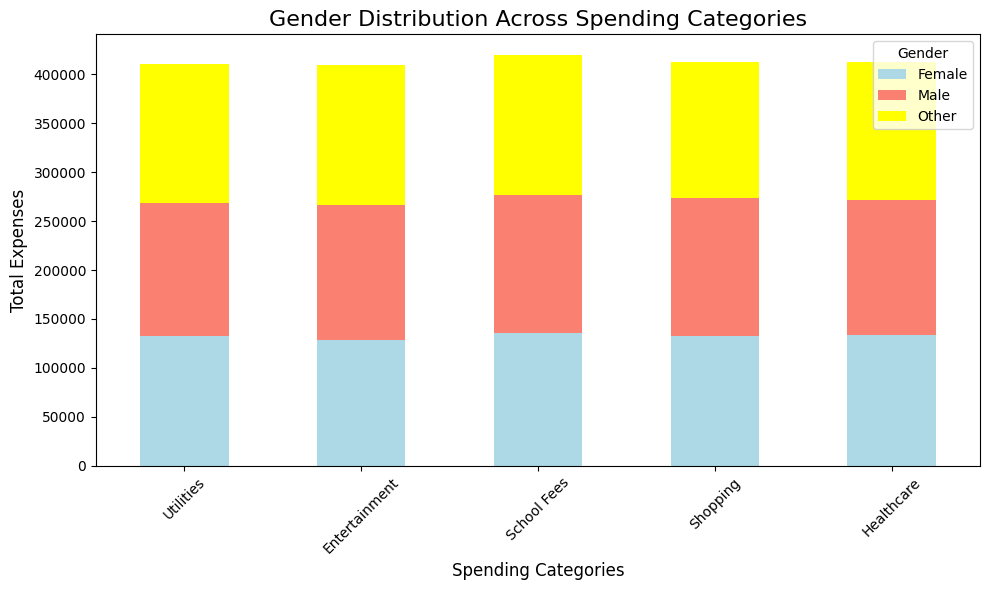

In [10]:
# Select expense columns and gender
expense_columns = ['Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare']
gender_expenses = data.groupby('Gender')[expense_columns].sum()

# Visualization
gender_expenses.T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon', 'yellow'])
plt.title("Gender Distribution Across Spending Categories", fontsize=16)
plt.xlabel("Spending Categories", fontsize=12)
plt.ylabel("Total Expenses", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("gender_spending_distribution.png")  # Save the chart as an image
plt.show()